### Importnig the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Importing the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
## Let's check if there is any missing values or not

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
## We can see in this data set Age,Cabin, and Embarked has some missing values
## we can also check visualy the missing values as well

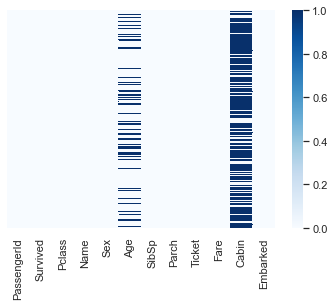

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='Blues')

In [8]:
### Dealing with missing values
## In the feture Cabin most of the values are missing so we can drop the column.
## Embarked columns has only two missing values so we delete those rows

In [9]:
df.drop(['Cabin'],axis=1,inplace=True)

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(df[['Age']])
df['Age'] = np.array(imputer.transform(df[['Age']]))

In [11]:
df.dropna(how='any',inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.shape

(889, 11)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
### NOw we don't have any missing values in our dataset.Now we encode categorical values. 
## Before that we have some features like 'PassengerId','Name','Ticket',which will not help the model to increase 
## the accurecy lavel. So for now we drop the fetures.

In [16]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
X = df.drop(['Survived'],axis=1,)
y = df['Survived']

In [19]:
X.shape

(889, 7)

In [20]:
y.shape

(889,)

In [21]:
## Now it's time for One hot encoding

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first'),[1,6])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Train Test Split the data

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [24]:
X_train.shape

(622, 8)

In [25]:
X_test.shape

(267, 8)

In [26]:
y_train.shape

(622,)

In [27]:
y_test.shape

(267,)

### Standerdize the data

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[[-1]]= sc.fit_transform(X_train[[-1]])
X_train[[4]]= sc.fit_transform(X_train[[4]])
X_test[[-1]] = sc.transform(X_test[[-1]])
X_test[[4]] = sc.transform(X_test[[4]])

### Training and Predicting

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 42)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [30]:
y_pred = classifier.predict(X_test)

### Making confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[139  28]
 [ 27  73]]


0.7940074906367042

### Training with K-NN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(X_test)

In [34]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[135  32]
 [ 48  52]]


0.700374531835206

### Try to find better value for K

In [35]:
from sklearn import metrics
k_range = list(range(1,26))
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

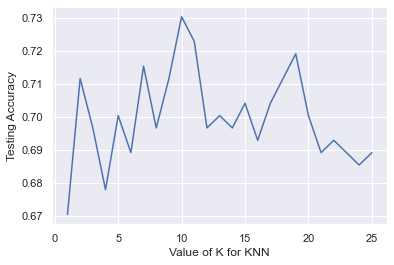

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [37]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=11)

In [38]:
## We can see the best value of n_neighbors = 11.

### Training a basic predictive model

In [39]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=42)
logmodel.fit(X_train,y_train)

C:\Users\indra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [40]:
y_pred = logmodel.predict(X_test)

In [41]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[141  26]
 [ 30  70]]


0.7902621722846442

## Cross Validation

### Parameter tuning

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
# 10 Fold cross validation with k=5 for KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y, cv=10, scoring='accuracy')
print(scores)

[0.60674157 0.65168539 0.6741573  0.70786517 0.73033708 0.70786517
 0.74157303 0.73033708 0.66292135 0.78409091]


In [44]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.6997574055158324


In [45]:
## Because we use cross validation so we are more confident about more accurate estimate of out of sample accuracy.

In [46]:
# Now try to find batter value for kew

In [47]:
k_range = list(range(1,31))
k_score = []
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y, cv=10, scoring='accuracy')
    k_score.append(scores.mean())
print(k_score)

[0.6951991828396323, 0.6996935648621042, 0.7166113381001021, 0.699731869254341, 0.6997574055158324, 0.6974591419816139, 0.7053626149131766, 0.6851123595505617, 0.6997063329928498, 0.6940755873340143, 0.7030898876404496, 0.6951864147088866, 0.7053243105209397, 0.7053115423901941, 0.7075842696629213, 0.710929519918284, 0.7132022471910113, 0.7075587334014302, 0.7086567926455567, 0.708682328907048, 0.7019152196118489, 0.714300306435138, 0.7131894790602656, 0.7053115423901942, 0.7008043922369765, 0.6996807967313585, 0.7019279877425946, 0.7030643513789582, 0.6985444330949949, 0.7075715015321757]


Text(0, 0.5, 'Cross Validated Accuracy')

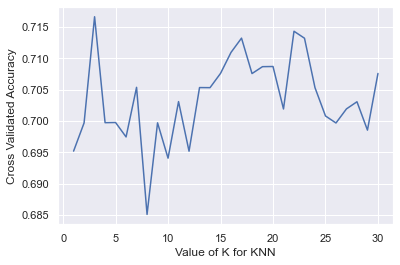

In [48]:
# Plot the value K for KNN
plt.plot(k_range,k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')

### Cross Validation:model selection

In [49]:
# 10 fold cross validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(knn, X,y, cv=10,scoring='accuracy').mean())

0.7166113381001021


In [50]:
# 10 fold cross validation with logisticregression
logmodel= LogisticRegression()
print(cross_val_score(logmodel, X,y, cv=10,scoring='accuracy').mean())

C:\Users\indra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\indra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7930796731358529


C:\Users\indra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
## Through Cross validation we understand accurecy lavel is higher in Logisticregression model so we chose logmodel.

## Optimising the Ml  Model

### GridsearchCV

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':[11,12,'elasticnet','none'],'dual':['False']},
             {'penalty':[11,12,'elasticnet','none'],'dual':['True']},
             {'C':[1.0,1.5,2.0,2.5]},
             {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
grid_search = GridSearchCV(estimator = logmodel,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

C:\Users\indra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
grid_search = grid_search.fit(X_train, y_train)

C:\Users\indra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
grid_search.best_params_

{'C': 2.5}

In [60]:
logmodel= LogisticRegression(C=2.5)
print(cross_val_score(logmodel, X,y, cv=10,scoring='accuracy').mean())

C:\Users\indra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\indra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7930669050051072


C:\Users\indra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
parameters = [{'n_neighbors':[2,5,8,10,12]},
             {'weights' :['uniform', 'distance']},
             {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}]
grid_search = GridSearchCV(estimator = knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [63]:
grid_search.best_params_

{'weights': 'distance'}

In [66]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
print(cross_val_score(knn, X,y, cv=10,scoring='accuracy').mean())

0.7165858018386109
